### Student Information
Name: 黃邦晏

Student ID: 111033631

GitHub ID: yen111033631

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip) by right-clicking it and open as a new tab. The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

In [2]:
### Begin Assignment Here

## First Part
the file is in the other repo, DM2022-Lab1-Master_HW.ipynb,  https://github.com/yen111033631/DM2022-Lab1-Master

---

## Second Part

### Data Preparation

In [5]:
import os, re, collections
import pandas as pd
import numpy as np
import sys
import helpers.data_mining_helpers as dmh

In [7]:
categories = ["amazon", "imdb", "yelp"]
columns=["sentence","score"]

amazon = pd.read_table("sentiment_labelled_sentences/amazon_cells_labelled.txt",header=None,names=columns)
imdb= pd.read_table("sentiment_labelled_sentences/imdb_labelled.txt",header=None,names=columns)
yelp= pd.read_table("sentiment_labelled_sentences/yelp_labelled.txt",header=None,names=columns)

amazon['company'] ="amazon"
imdb['company'] ="imdb"
yelp['company'] ="yelp"

df = pd.concat([amazon,imdb,yelp], ignore_index=True)
df

,sentence,score,company
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
2743,I think food should have flavor and texture an...,0,yelp
2744,Appetite instantly gone.,0,yelp
2745,Overall I was not impressed and would not go b...,0,yelp
2746,"The whole experience was underwhelming, and I ...",0,yelp


In [8]:
print("The shape of raw data:",df.shape)

The shape of raw data: (2748, 3)


---

### Missing value

In [9]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,company
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


---

### Dealing with Duplicate Data

In [11]:
sum(df.duplicated())

17

In [12]:
len(df)

2748

In [14]:
df.drop_duplicates(keep=False, inplace=True)

In [15]:
len(df)

2714

In [18]:
df_sample = df.sample(n=1000)
print(len(df_sample))
df_sample

1000


,sentence,score,company
2661,How can you call yourself a steakhouse if you ...,0,yelp
680,And none of the tones is acceptable.,0,amazon
1795,"The burger is good beef, cooked just right.",1,yelp
669,Setup went very smoothly.,1,amazon
1463,Special mention should be made of the superb m...,1,imdb
...,...,...,...
1298,This movie is a good and humorous comment on l...,1,imdb
1488,This is just a great movie.,1,imdb
2634,The service was extremely slow.,0,yelp
670,its extremely slow and takes forever to do any...,0,amazon


yelp      992
amazon    980
imdb      742
Name: company, dtype: int64


<AxesSubplot: title={'center': 'Company distribution'}>

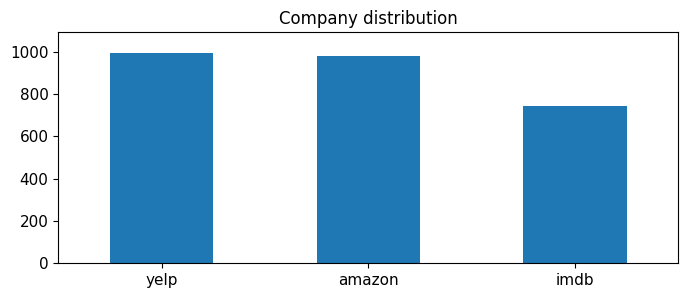

In [23]:
print(df.company.value_counts())

# plot barchart for df
df.company.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution',
                                    ylim = [0, df.company.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon    367
yelp      355
imdb      278
Name: company, dtype: int64


<AxesSubplot: title={'center': 'Company distribution (Sampled)'}>

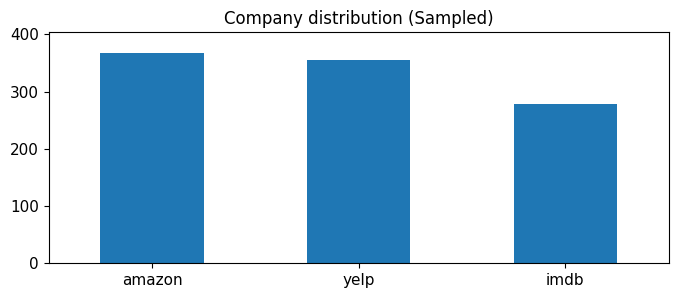

In [24]:
print(df_sample.company.value_counts())

# plot barchart for df
df_sample.company.value_counts().plot(kind = 'bar',
                                    title = 'Company distribution (Sampled)',
                                    ylim = [0, df_sample.company.value_counts().max()*1.1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

amazon    367
yelp      355
imdb      278
Name: company, dtype: int64
         df  df_sample
yelp    992        355
amazon  980        367
imdb    742        278


<AxesSubplot: title={'center': 'Category distribution'}>

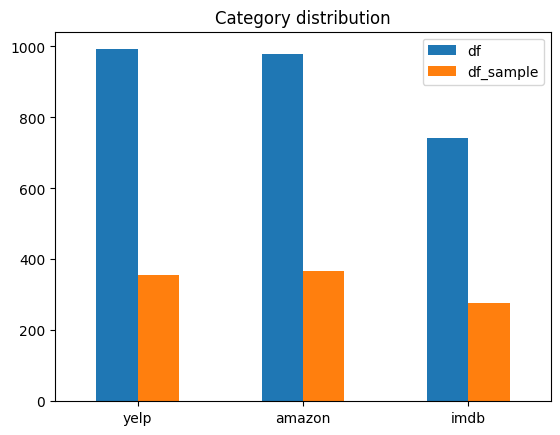

In [25]:
# Answer here
print(df_sample.company.value_counts())

df_sample_count = df_sample.company.value_counts()
df_count = df.company.value_counts()
index = df_count.index
df_sample_count = df_sample_count[index]

plt_blar = pd.DataFrame({"df": df_count.values,
                         "df_sample": df_sample_count.values}, 
                        index=index)
print(plt_blar)

plt_blar.plot.bar(rot=0, title = 'Company distribution')

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
print(df_counts[:])

  (0, 4159)	1
  (0, 4543)	1
  (0, 2426)	1
  (0, 3042)	1
  (0, 4985)	1
  (0, 1828)	1
  (0, 2808)	1
  (0, 4607)	1
  (0, 3385)	1
  (0, 2431)	1
  (0, 2313)	2
  (0, 2157)	1
  (0, 4529)	1
  (0, 4833)	1
  (0, 4791)	1
  (0, 1981)	1
  (0, 646)	1
  (0, 1012)	1
  (1, 1992)	1
  (1, 712)	1
  (1, 1602)	1
  (1, 4859)	1
  (2, 1828)	1
  (2, 4529)	1
  (2, 2022)	1
  :	:
  (2713, 4543)	1
  (2713, 4607)	1
  (2713, 2431)	1
  (2713, 2313)	1
  (2713, 4529)	3
  (2713, 646)	1
  (2713, 2281)	1
  (2713, 4540)	1
  (2713, 3096)	1
  (2713, 4972)	1
  (2713, 2981)	1
  (2713, 4591)	1
  (2713, 297)	1
  (2713, 3165)	1
  (2713, 2629)	1
  (2713, 1539)	1
  (2713, 4546)	1
  (2713, 784)	1
  (2713, 4628)	1
  (2713, 588)	1
  (2713, 2067)	1
  (2713, 3855)	1
  (2713, 3435)	1
  (2713, 5108)	1
  (2713, 1386)	1


In [40]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])
tokenized_sen = analyze(df[0:1]['sentence'][0])
tokenized_sen

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [41]:
df_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [43]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]]

plot_z = df_counts[0:20, 0:20].toarray()

['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']


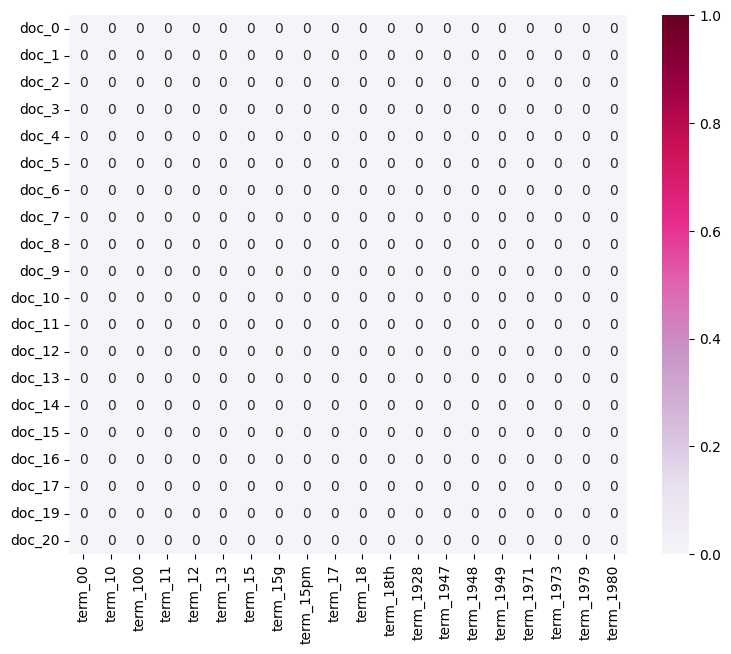

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [53]:
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape

(2714, 2)

In [56]:
categories
print(df_reduced)
df['company']

[[ 0.72253878  1.10532723]
 [-1.02862925  0.02793076]
 [-0.28912074 -0.00936105]
 ...
 [-0.51567053 -0.57769696]
 [ 0.30817678 -0.75715576]
 [ 2.16875905  0.35122183]]


0       amazon
1       amazon
2       amazon
3       amazon
4       amazon
         ...  
2743      yelp
2744      yelp
2745      yelp
2746      yelp
2747      yelp
Name: company, Length: 2714, dtype: object

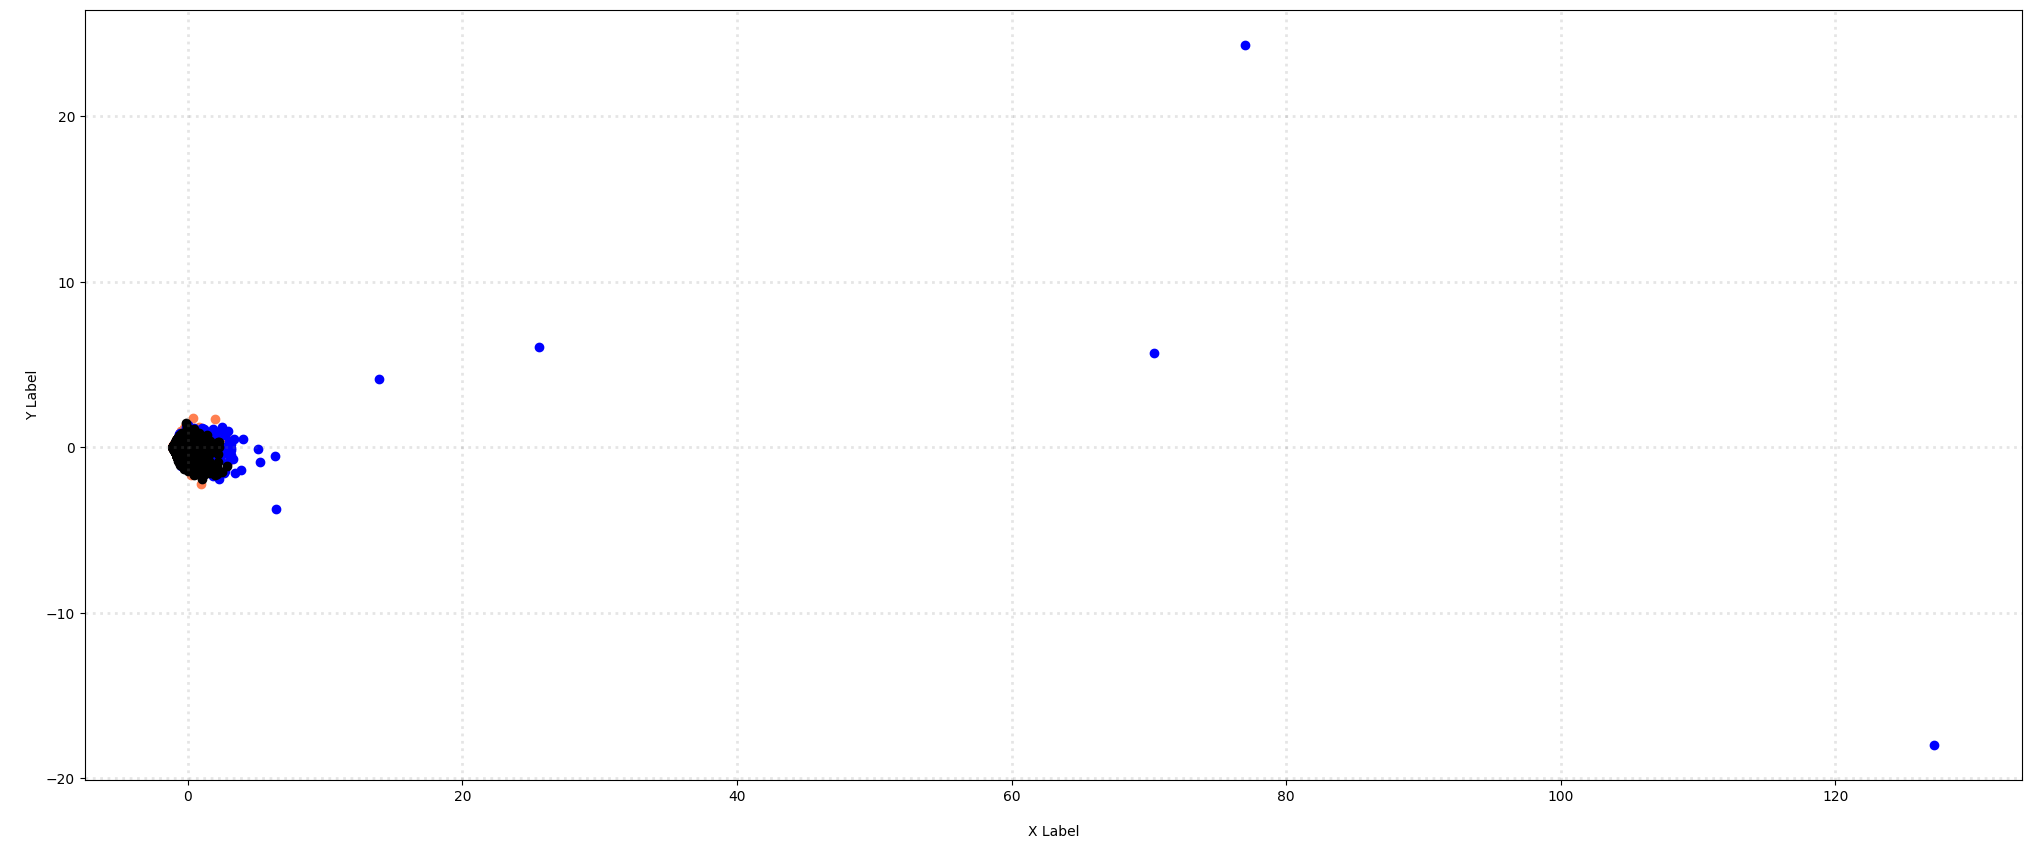

In [59]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['company'] == category].T[0]
    ys = df_reduced[df['company'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

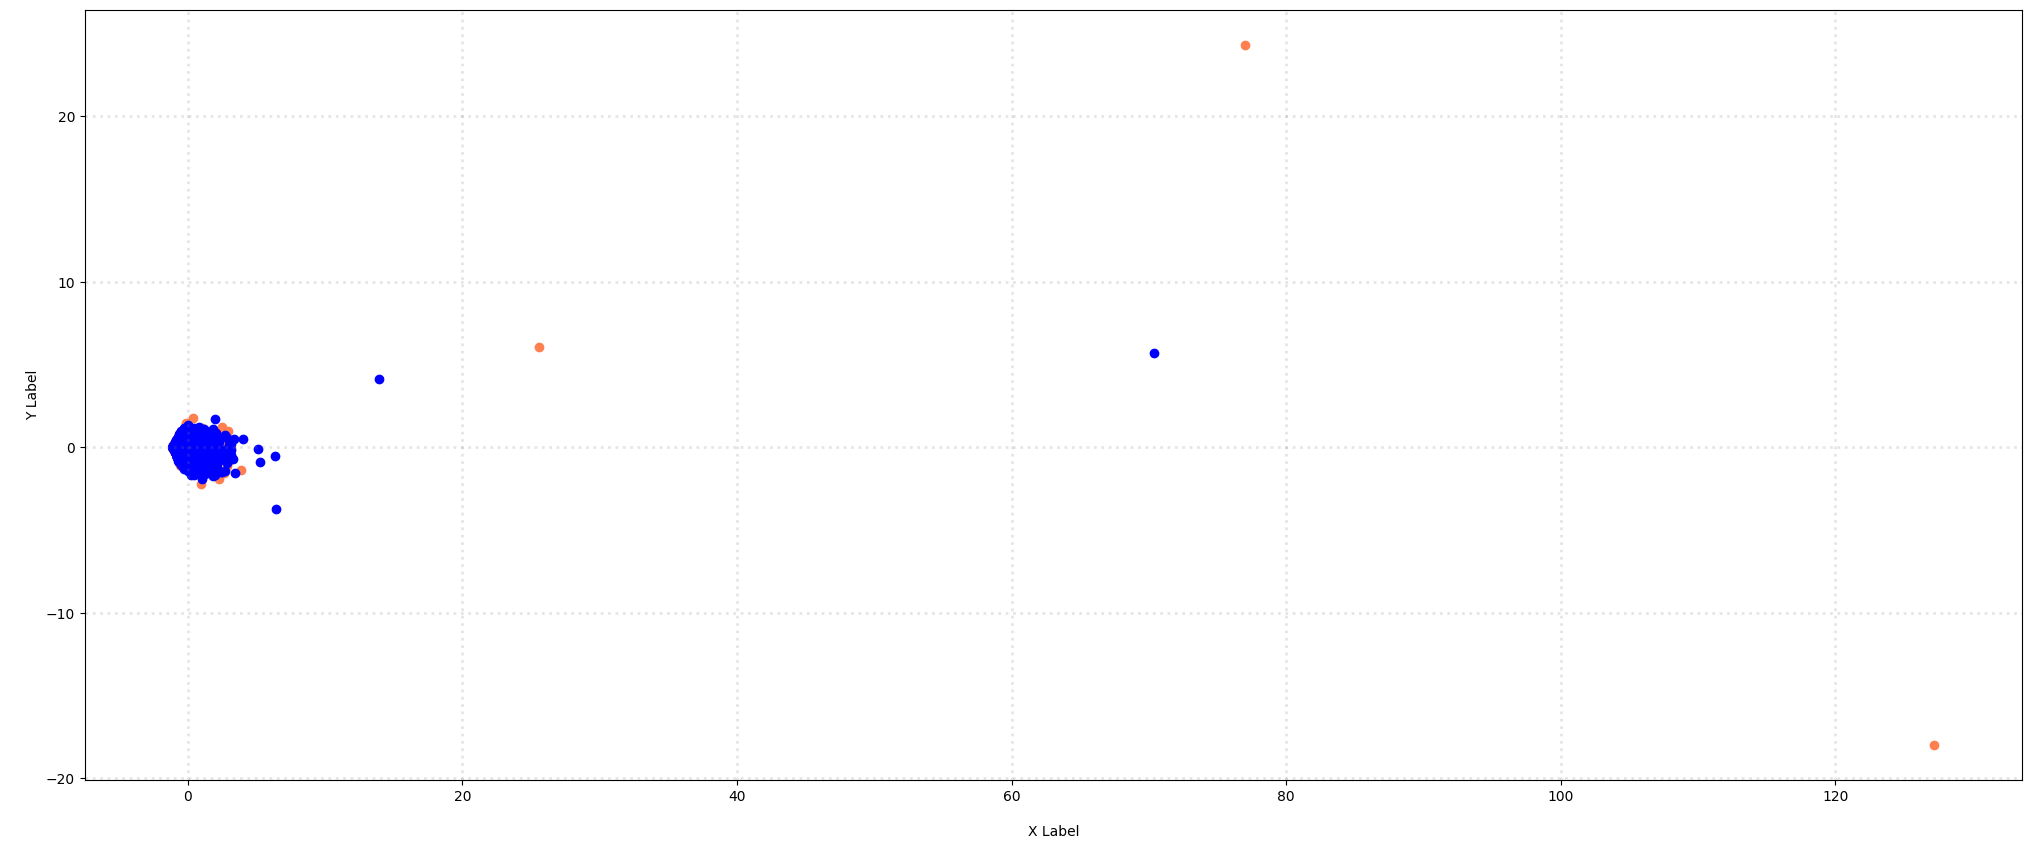

In [75]:
# Plot 2D PCA figure
categories = [0, 1]
col = ['coral', 'blue']

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = df_reduced[df['score'] == category].T[0]
    ys = df_reduced[df['score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

---

In [60]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [61]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [62]:
term_frequencies[0] #sum of first term

1

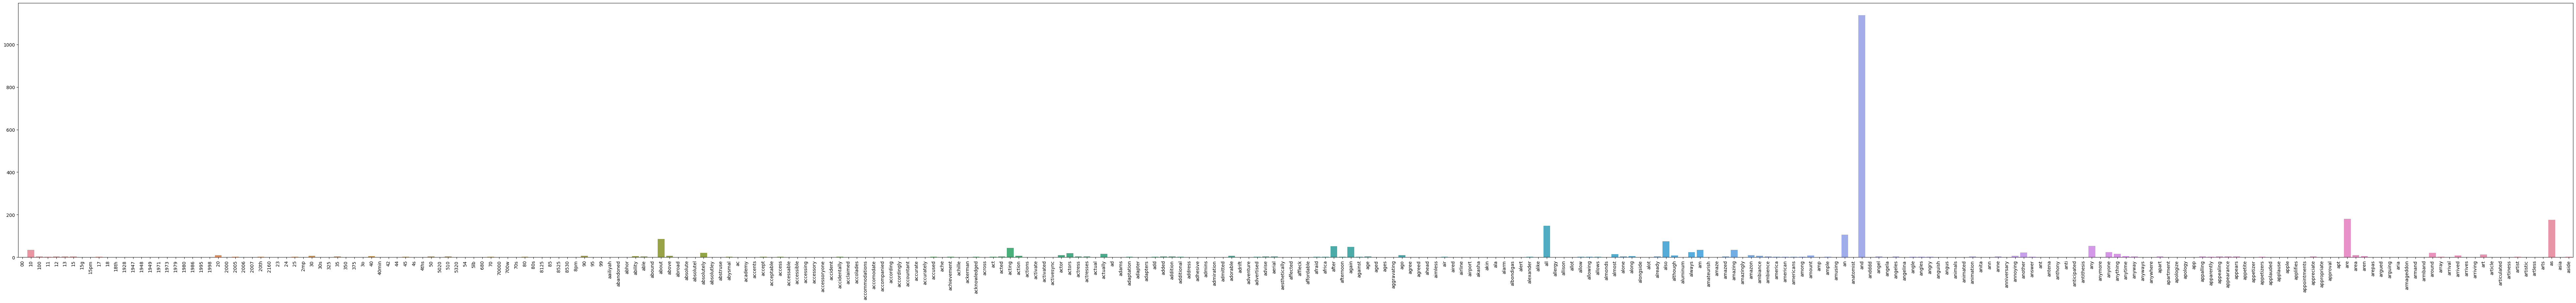

In [63]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


In [64]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

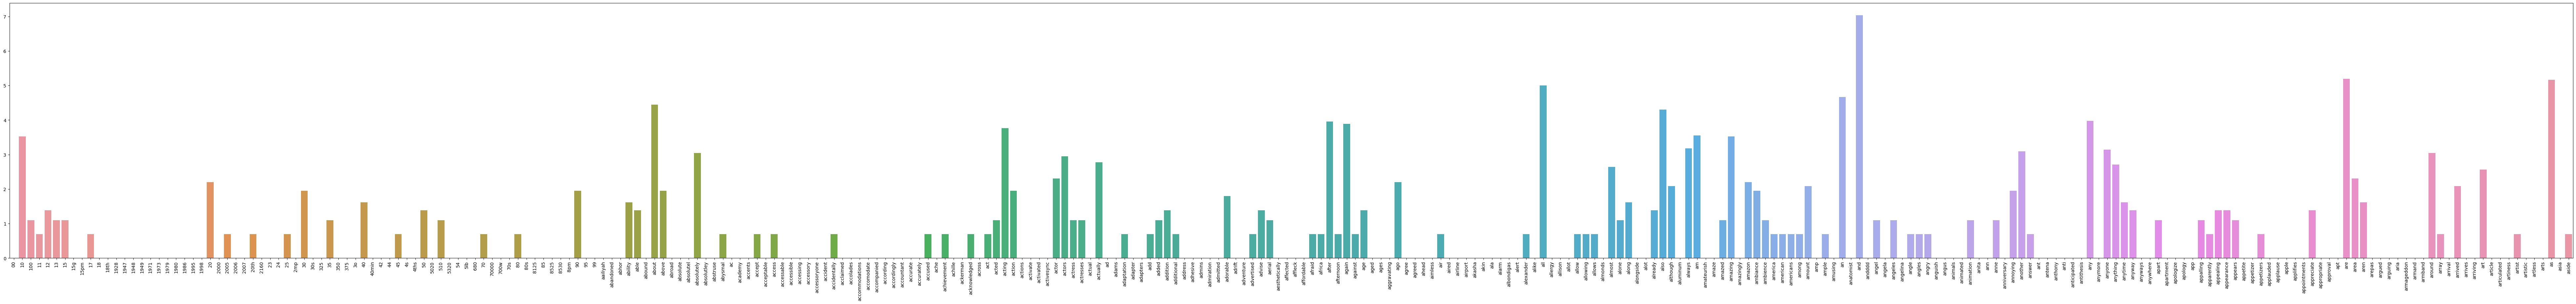

In [66]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

---

## Discretization and Binarization

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(df.company)

LabelBinarizer()

In [69]:
df['bin_category'] = mlb.transform(df['company']).tolist()

In [70]:
df[0:9]

,sentence,score,company,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,"[1, 0, 0]"
1,"Good case, Excellent value.",1,amazon,"[1, 0, 0]"
2,Great for the jawbone.,1,amazon,"[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,amazon,"[1, 0, 0]"
4,The mic is great.,1,amazon,"[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,amazon,"[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,amazon,"[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,amazon,"[1, 0, 0]"


---

## Third Part
### New Data Visualizations

In [89]:
# !pip install wordcloud 

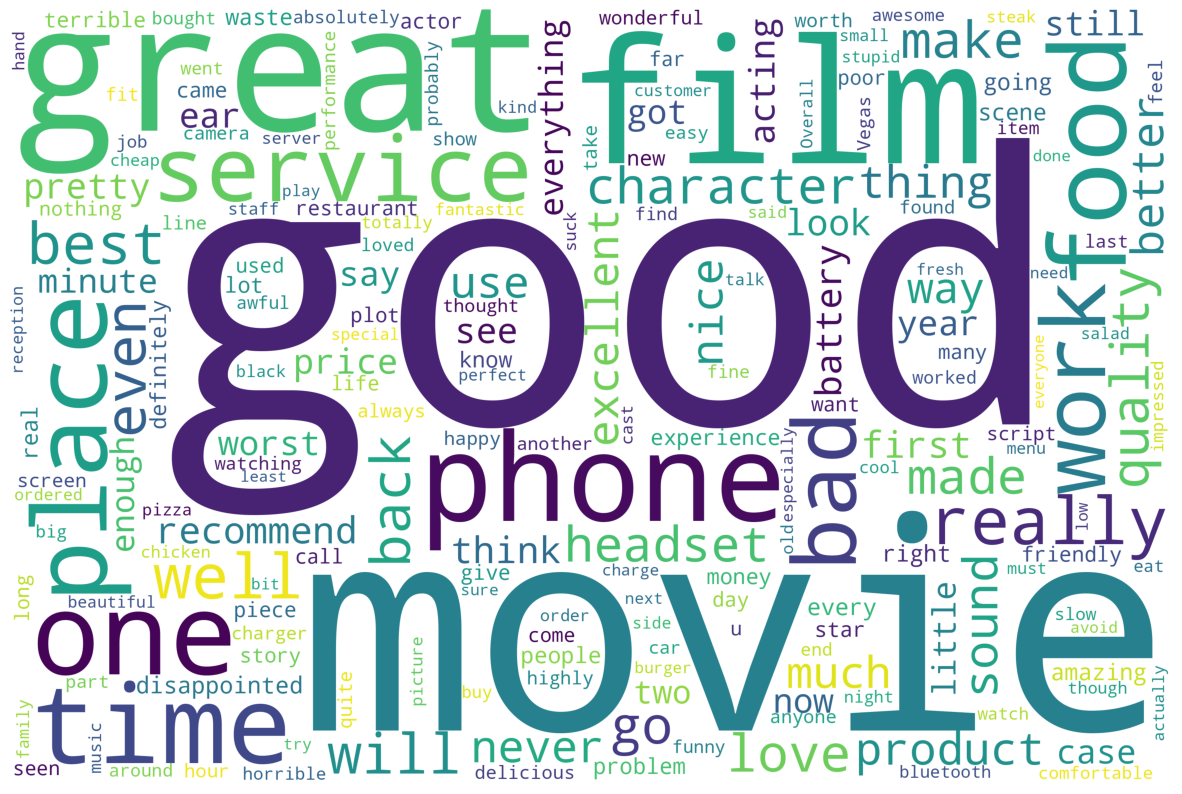

In [84]:
# Plot word cloud of the dataset
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

text = ' '.join(df.sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

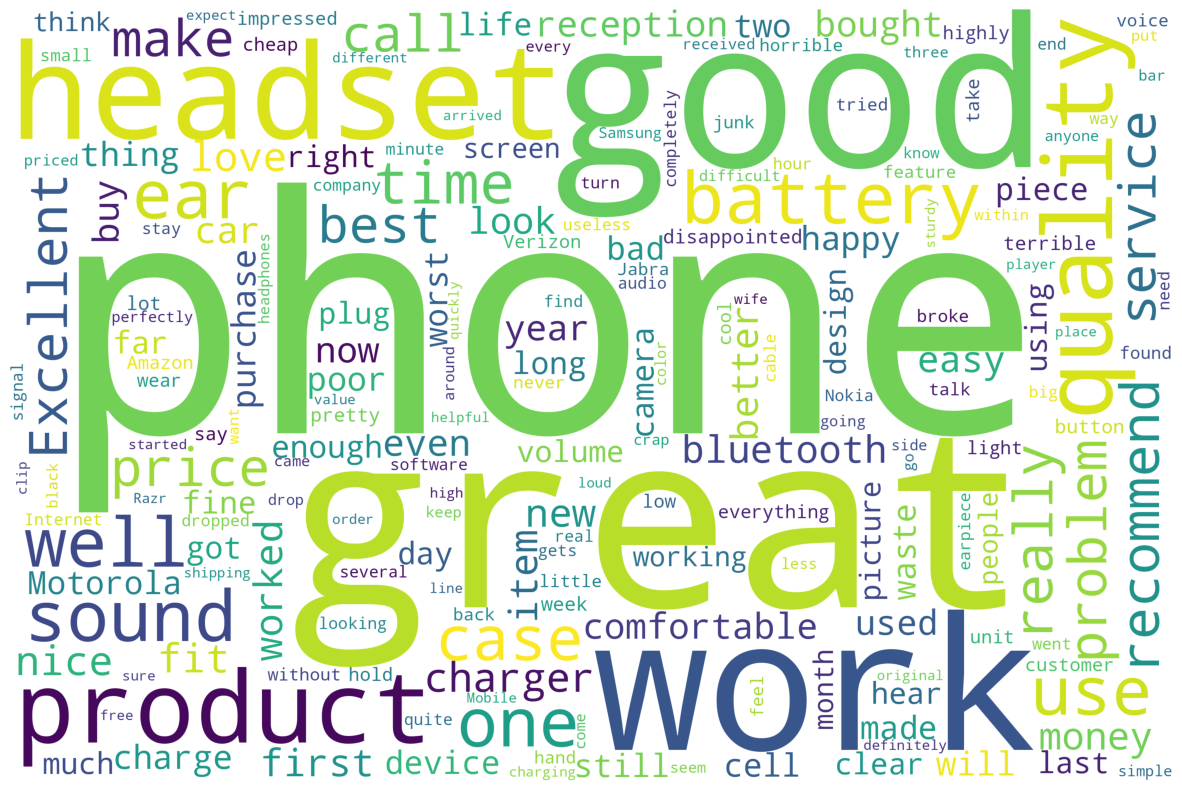

In [85]:
# Plot word cloud of the dataset from amazon
text = ' '.join(df.loc[df['company'] == 'amazon'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

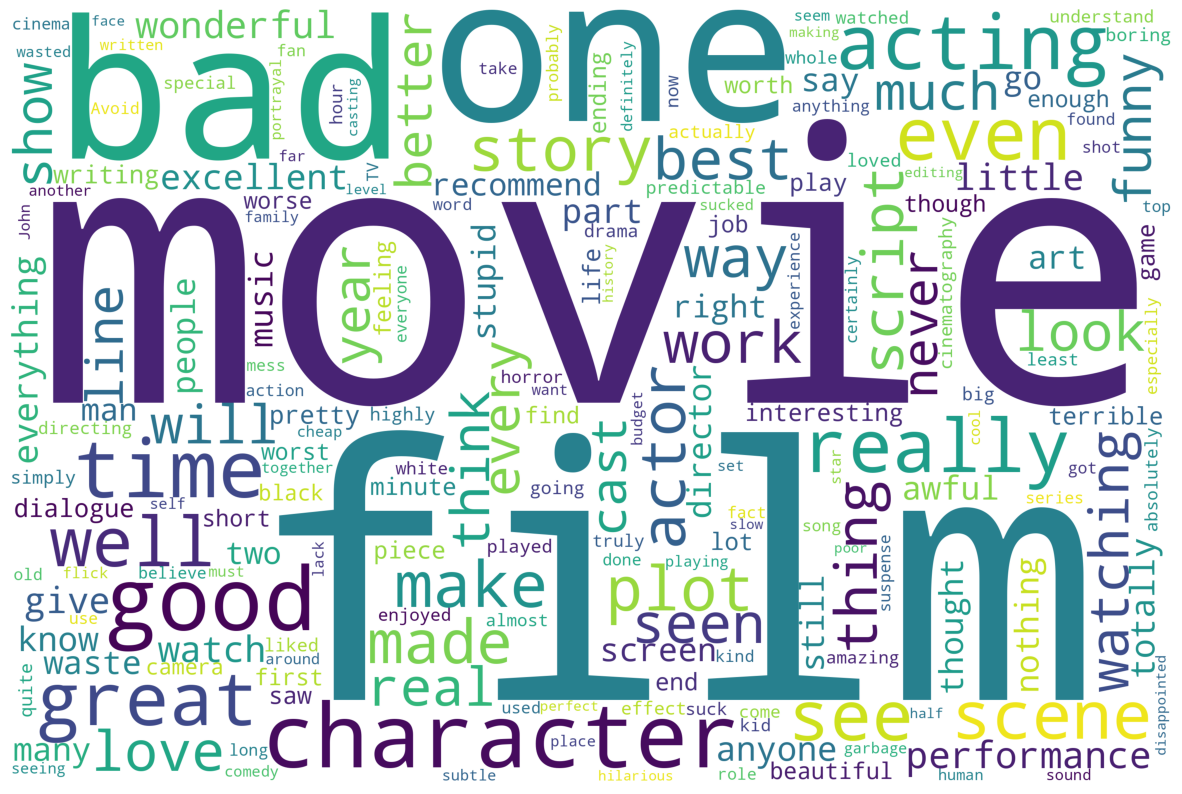

In [86]:
# Plot word cloud of the dataset from imdb
text = ' '.join(df.loc[df['company'] == 'imdb'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

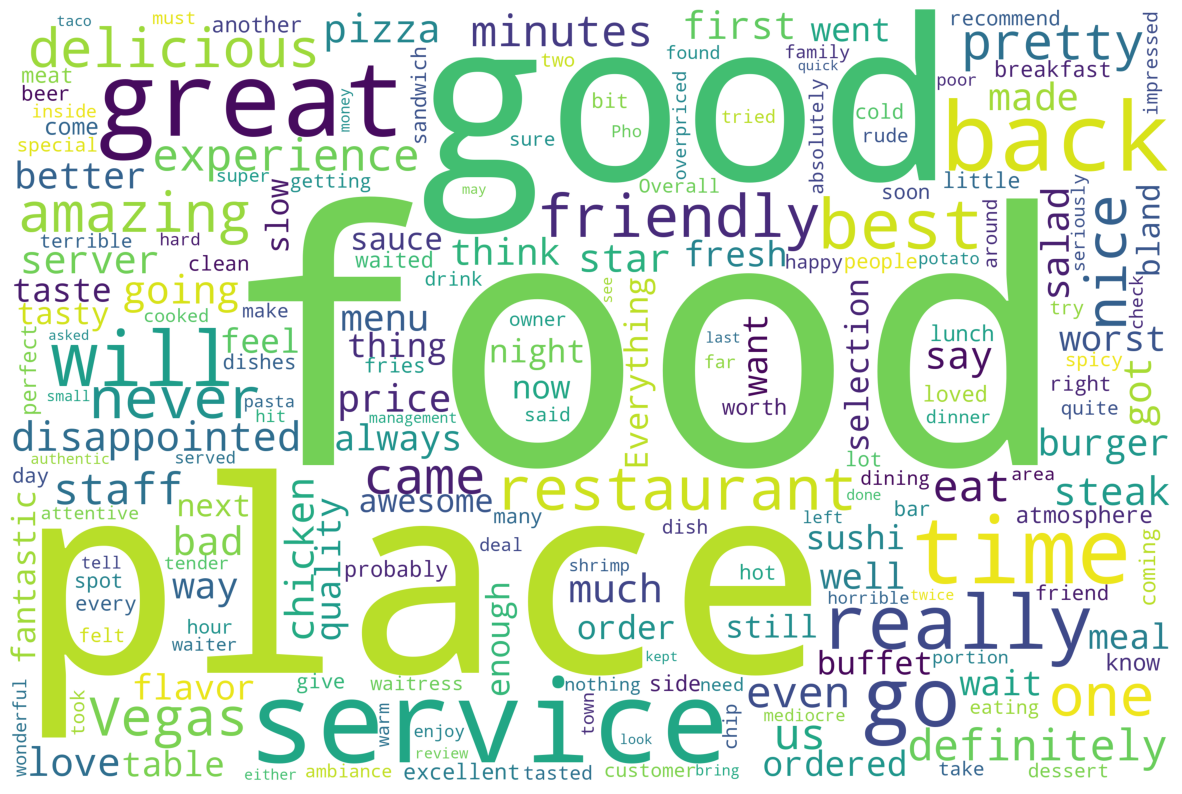

In [87]:
# Plot word cloud of the dataset from yelp
text = ' '.join(df.loc[df['company'] == 'yelp'].sentence)
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', collocations=False, stopwords = STOPWORDS).generate(text)
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud) 
plt.axis("off")
plt.show()

---

### TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
vectorizer = TfidfVectorizer()
matrix_vect = vectorizer.fit_transform(df.sentence)
df_tfidf = pd.DataFrame(matrix_vect.toarray(), columns = vectorizer.get_feature_names())
df_tfidf.head()

/home/neaf2070/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
print (df_tfidf.shape)

(2714, 5153)


---

### Naive Bayes classifier

In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [78]:
#for word frequency features
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
x = vectorizer.fit_transform(df['sentence'])

encoder = LabelEncoder()
y = encoder.fit_transform(df['score'])

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=11)

mlt = MultinomialNB()
mlt.fit(x_train, y_train)
y_predict = mlt.predict(x_test)

print("acc：",mlt.score(x_test,y_test))

acc： 0.8250460405156538


In [80]:
# for TF-UDF features
from sklearn.feature_extraction.text import TfidfVectorizer

x_train, x_test, y_train, y_test = train_test_split(df.sentence,df.score,test_size=0.2, random_state=11)

tf = TfidfVectorizer()
x_train = tf.fit_transform(x_train)
x_test = tf.transform(x_test)

mlt = MultinomialNB(alpha=1.0)
mlt.fit(x_train,y_train)
y_predict = mlt.predict(x_test)

print("acc：",mlt.score(x_test,y_test))

acc： 0.8250460405156538


---


## Fourth Part